## Exercici 
Descarrega el data set [Airlines Delay: Airline on-time statistics and delay causes](https://www.kaggle.com/giovamata/airlinedelaycauses) i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [33]:
import os, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joypy

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.options.display.max_columns = None

datasets_path = r"D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets" + os.sep
file = datasets_path + "DelayedFlights.csv"
df = pd.read_csv(file, sep=',', encoding='utf8', index_col=0)
df.head(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Documentació de la descripció de les columnes a [Get the data](http://stat-computing.org/dataexpo/2009/the-data.html)
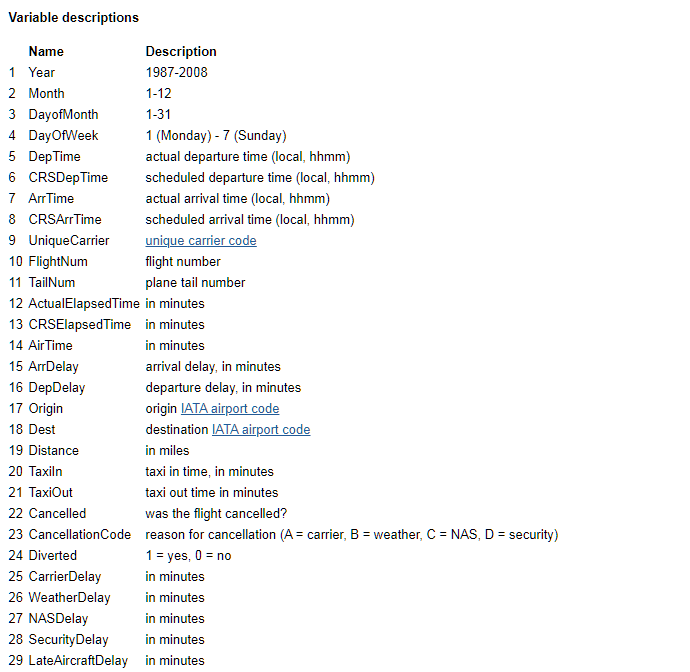

In [3]:
#esborrem les columnes que no considerem d'interès
df.drop(['FlightNum', 'TailNum', 'ArrTime', 'CRSArrTime', 'CRSElapsedTime', 
         'TaxiIn', 'TaxiOut', 'DepTime', 'CRSDepTime', 'CarrierDelay', 
         'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay' ], 
        axis = 'columns', inplace=True)

In [10]:
#canviem els noms de les cols que hem conservat
old_col_names = list(df.columns)
new_col_names = ["ANY", "MES", "DIA", "DIA_SET", "COD_AEROLINIA", "DURADA_TOTAL", "DURACIÓ DEL VOL", 
                 "RETARD ARRIBADA", "RETARD SORTIDA", "COD_ORIGEN", "COD_DESTI", "DISTANCIA", 
                 "CANCELAT", "COD_CANCELACIO", "DESVIAT" ]

replace = dict(zip(old_col_names, new_col_names))
df.rename(columns=replace, inplace=True)
df.sample(3)

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURACIÓ DEL VOL,RETARD ARRIBADA,RETARD SORTIDA,COD_ORIGEN,COD_DESTI,DISTANCIA,CANCELAT,COD_CANCELACIO,DESVIAT
404499,2008,1,24,4,MQ,48.0,22.0,12.0,14.0,MKE,ORD,67,0,N,0
1657596,2008,3,1,6,9E,78.0,63.0,3.0,25.0,MEM,MCI,392,0,N,0
2942976,2008,5,21,3,B6,185.0,130.0,50.0,32.0,MCO,LGA,950,0,N,0


In [11]:
#convertirem int64 i float64 a int32 i float32 per reduir el dataframe
#definim una funcio que genera el diccionari de conversió de tipus
def dic_convert(colsint, colsfloat):
    dtype_l = []
    for i in range(0, len(colsint)): dtype_l.append("int32")
    for i in range(0, len(colsfloat)): dtype_l.append("float32")
    return dict(zip(colsint+colsfloat, dtype_l))

colsint = ["ANY", "MES", "DIA", "DIA_SET", "DISTANCIA", 
           "CANCELAT", "DESVIAT"]
colsfloat = ["DURADA_TOTAL", "DURACIÓ DEL VOL", "RETARD ARRIBADA", "RETARD SORTIDA"]
dic = dic_convert(colsint, colsfloat)
df = df.astype(dic)

df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ANY              int32  
 1   MES              int32  
 2   DIA              int32  
 3   DIA_SET          int32  
 4   COD_AEROLINIA    object 
 5   DURADA_TOTAL     float32
 6   DURACIÓ DEL VOL  float32
 7   RETARD ARRIBADA  float32
 8   RETARD SORTIDA   float32
 9   COD_ORIGEN       object 
 10  COD_DESTI        object 
 11  DISTANCIA        int32  
 12  CANCELAT         int32  
 13  COD_CANCELACIO   object 
 14  DESVIAT          int32  
dtypes: float32(4), int32(7), object(4)
memory usage: 533.8 MB


In [17]:
#importem l'arxiu d'aerolínies com una series per introduïr una columna amb els noms reals de les aerolínies
file = datasets_path + "DelayedFlights-carriers.csv"
ap_s = pd.read_csv(file, sep=',', encoding='utf8', index_col=0, squeeze=True)
ap_s.sample(3)

#afegim la columna del nom de l'aerolínia mapejant el codi de la taula
#creem la nova columna mapejant la series
df["AEROLÍNIA"] = df["COD_AEROLINIA"].map(ap_s)
del ap_s

#treiem l'explicació entre parèntesi d'una aerolínia que ens allarga molt el titol
import re
df["AEROLÍNIA"] = df["AEROLÍNIA"].apply(lambda x: re.sub(r' +\(.*\)', '', x))

## Exercici

Fes un informe complet del data set:.

### Resumeix estadísticament les columnes d’interès

#### (Introduïm gràfiques de la pràctica 6)

In [20]:
#funció per arrodonir al multiple de 10 més proper (cap amunt: direccio = "sup"; cap avall: direccio = "inf")
#la creem per establir els ticks dels eixos al múltiple de 10 més proper als quantils q1 i q2 establerts
def round10(x, direccio):
    if x % 10 == 0: return int(x)
    x = int(x)
    if x == 0: return 0
    last_digit = int(str(x)[-1])
    if x < 0:
        if direccio == "sup": return (x + last_digit)
        elif direccio == "inf": return (x - 10 + last_digit)
    elif x > 0:
        if direccio == "sup": return (x + 10 - last_digit)
        elif direccio == "inf": return (x - last_digit)
        
#creem una funció que donada una series i el porcentatge dels quantils ens retornarà un rang dels valors temporals
#de la series pasada per fer visualitzacions selectives dels rangs significatius (arrodonirem aquests valors a desenes)
def genera_rang_arrodonit(series, qmin, qmax):
    qmin /= 100
    qmax /= 100
    values = series.values
    vmin, vmax = np.quantile(values, qmin), np.quantile(values, qmax)
    vmin = round10(vmin, "inf")
    vmax = round10(vmax, "sup")
    return vmin, vmax

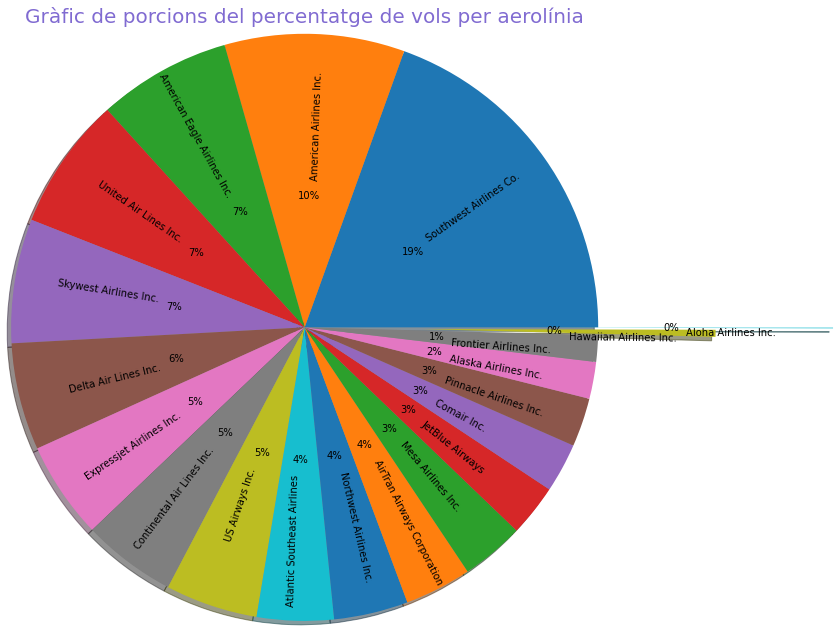

In [25]:
titol = "Gràfic de porcions del percentatge de vols per aerolínia"
data = df['AEROLÍNIA'].value_counts()

#extreiem una proporció de les porcions de les dues aerolínies amb menys vols per visualitzar-ho sense solapament
myexplode = [0] * len(data.index)
myexplode[-2:] = [.6, 1.2]

plt.figure(figsize =(9, 9))
plt.pie(x=data.values, labels=data.index, autopct='%1.0f%%', startangle=0, explode=myexplode, shadow = True,
        pctdistance=.45, labeldistance=.5, rotatelabels=True, radius=1.5, normalize=True)

plt.title(titol, fontsize=20, color='#6146C6', alpha=0.8, loc="center", pad=60)
plt.show()

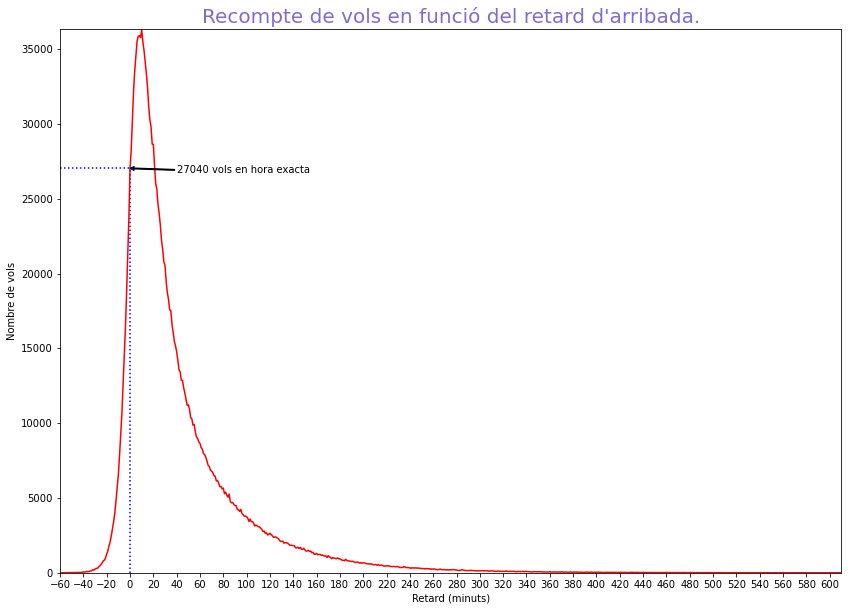

In [26]:
titol = "Recompte de vols en funció del retard d'arribada."
data = df["RETARD ARRIBADA"].value_counts()

#dibuixarem la gràfica entre els els quantils que van del 5 al 60% (arrodonits a desenes)
xmin, xmax = genera_rang_arrodonit(data.index, 1, 60)

plt.figure(figsize =(14, 10))
sns.lineplot(x=data.index, y=data.values, color="r")
plt.title(titol, fontsize=20, color='#6146C6', alpha=0.8)
plt.xlabel('Retard (minuts)')
plt.ylabel('Nombre de vols')

plt.vlines(x=0, ymin=0, ymax=data[0], colors="blue", linestyles="dotted")
plt.hlines(y=data[0], xmin=xmin, xmax=0, colors="blue", linestyles="dotted")
plt.annotate(text="{} vols en hora exacta".format(data[0]), xy=(0, data[0]), 
             xytext=(40 , data[0] + 225), 
             arrowprops=dict(facecolor='blue', headwidth=4, width=1, headlength=4), 
             horizontalalignment='left', verticalalignment='top')

plt.xlim(xmin, xmax)
plt.ylim(0, data.values.max()+50)
plt.xticks(np.arange(xmin, xmax, step=20))
plt.show()

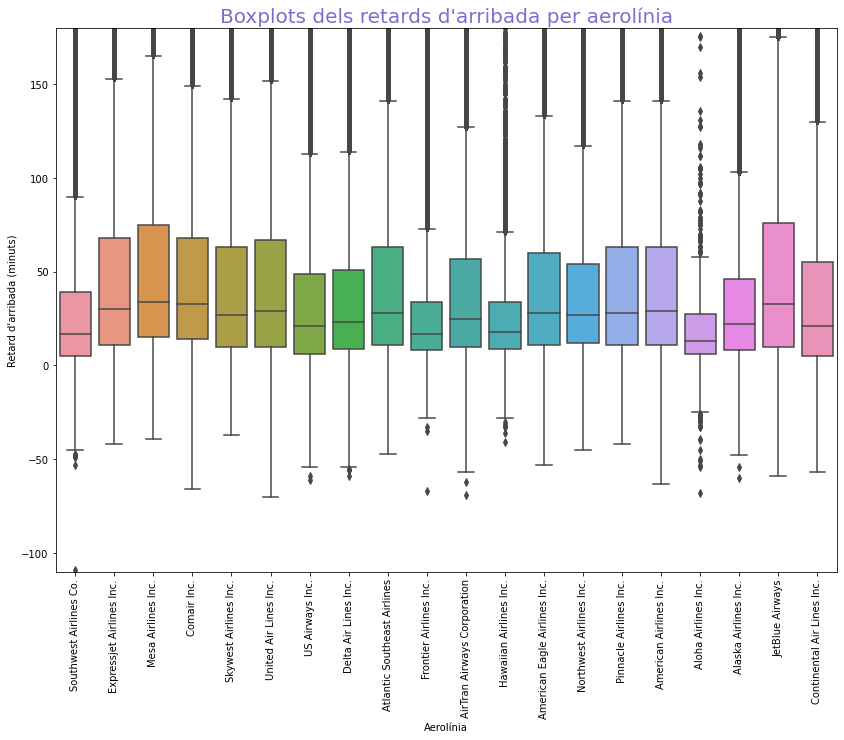

In [29]:
titol = "Boxplots dels retards d'arribada per aerolínia"
data = df[['AEROLÍNIA', 'RETARD ARRIBADA']].copy()
data.dropna(inplace=True)

#establim el rang de visualització entre els quantils que van del 0 al 97% (Arrodonint a desenes)
ymin, ymax = genera_rang_arrodonit(data["RETARD ARRIBADA"], 0, 97)

plt.figure(figsize =(14, 10))
sns.boxplot(x=data["AEROLÍNIA"], y=data["RETARD ARRIBADA"])
plt.title(titol, fontsize=20, color='#6146C6', alpha=0.8)
plt.xlabel("Aerolínia")
plt.ylabel("Retard d'arribada (minuts)")
plt.xticks(rotation='vertical')
plt.ylim(ymin, ymax)
plt.show()

<Figure size 1008x720 with 0 Axes>

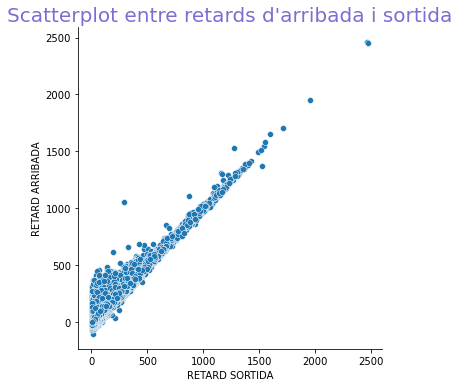

In [30]:
titol = "Scatterplot entre retards d'arribada i sortida"
data = df[["RETARD SORTIDA", "RETARD ARRIBADA"]]

#fem l'scatterplot entre les dues columnes
plt.figure(figsize =(14, 10))
axes = sns.relplot(data=data, x="RETARD SORTIDA", y="RETARD ARRIBADA", kind="scatter")
plt.title(titol, fontsize=20, color='#6146C6', alpha=0.8)
plt.show()

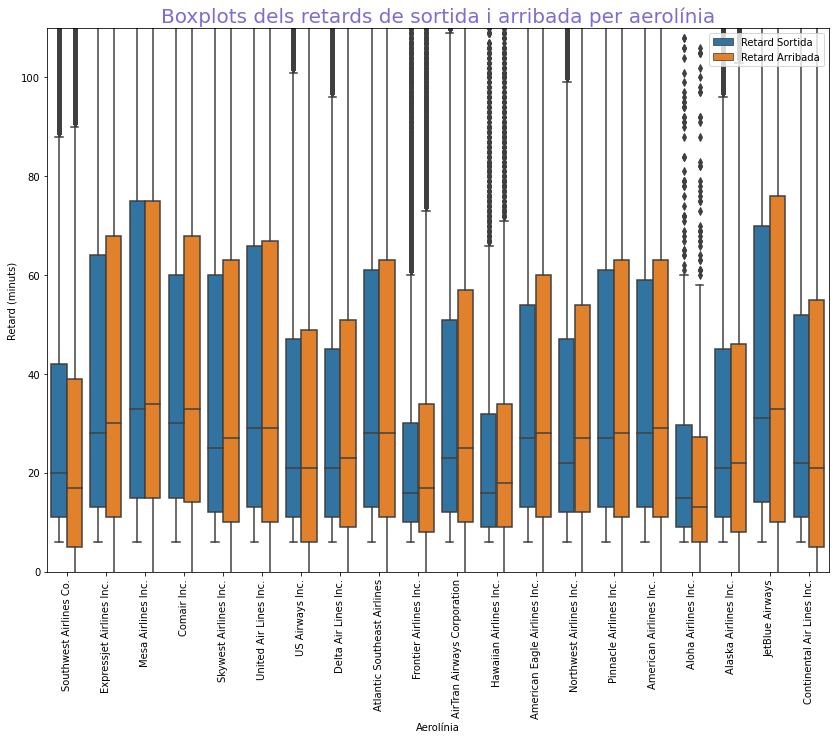

In [32]:
titol = "Boxplots dels retards de sortida i arribada per aerolínia"

r_sort_df = df[['AEROLÍNIA', 'RETARD SORTIDA']].copy()
r_sort_df.rename(columns={'RETARD SORTIDA': 'RETARD'}, inplace = True)
r_sort_df['TIPUS'] = "Retard Sortida"
r_arr_df = df[['AEROLÍNIA', 'RETARD ARRIBADA']].copy()
r_arr_df.rename(columns={'RETARD ARRIBADA': 'RETARD'}, inplace = True)
r_arr_df['TIPUS'] = "Retard Arribada"
data = pd.concat([r_sort_df, r_arr_df])
del r_sort_df, r_arr_df
data.dropna(inplace=True)


#establim els limits de visualització
ymin, ymax = genera_rang_arrodonit(data["RETARD"], 5, 90)

plt.figure(figsize =(14, 10))
sns.boxplot(x=data["AEROLÍNIA"], y=data["RETARD"], hue=data["TIPUS"], )
plt.title(titol, fontsize=20, color='#6146C6', alpha=0.8)
plt.xlabel("Aerolínia")
plt.ylabel("Retard (minuts)")
plt.xticks(rotation='vertical')
plt.legend(loc='upper right')
plt.ylim(ymin, ymax)

plt.show()

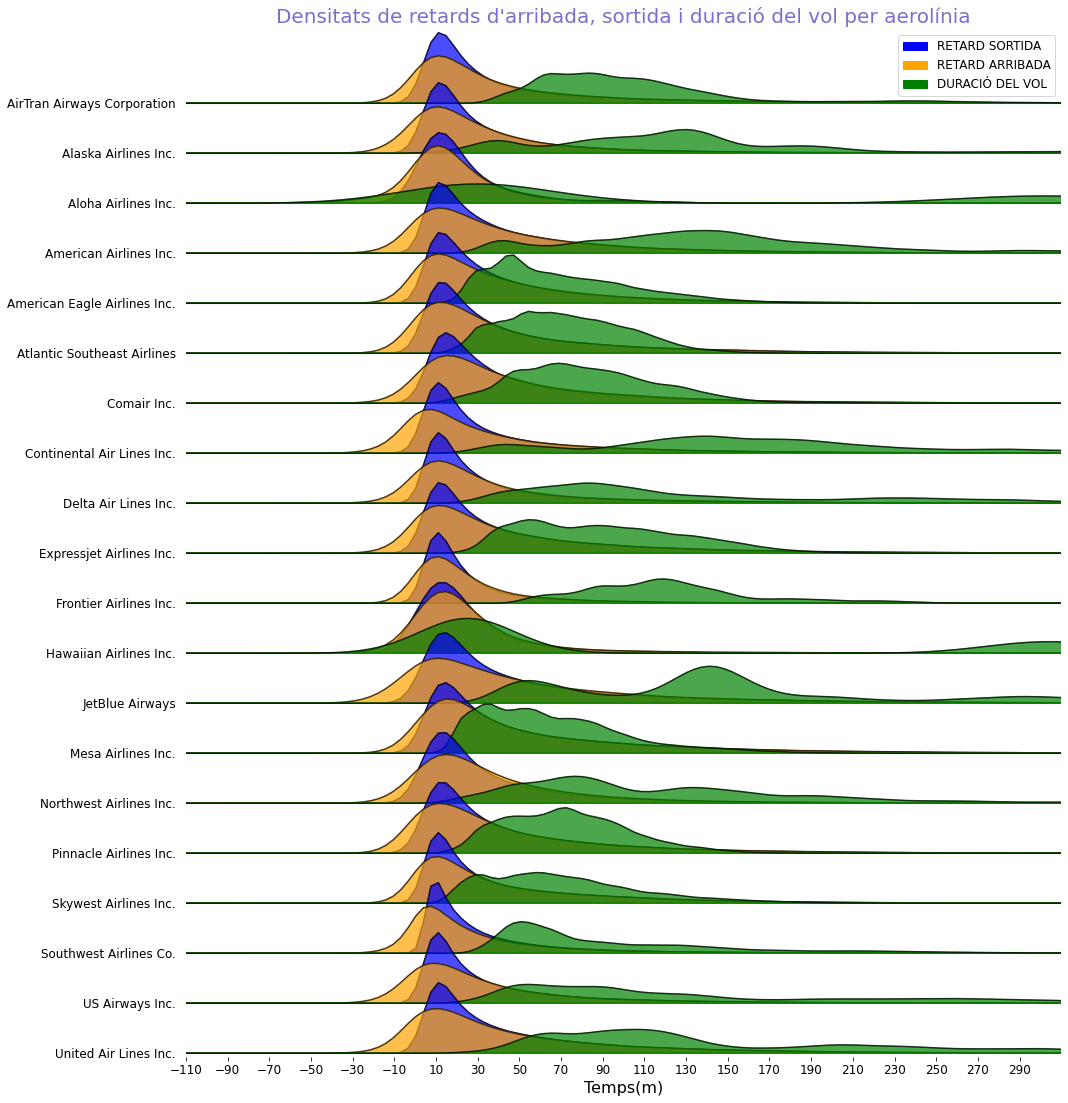

In [36]:
titol = "Densitats de retards d'arribada, sortida i duració del vol per aerolínia"

#podem dibuixar un ridgeline amb les corves de densitat de retards i duració del vol per cadascuna de les aerolínies
#com ens torna dades de probabilitats, veiem que aquestes s'extenen més enllà dels valors reals possibles
#(com duracions de vol negatives)
data = df[["AEROLÍNIA", "RETARD SORTIDA", "RETARD ARRIBADA", "DURACIÓ DEL VOL"]].copy()
data.dropna(inplace=True)

#establim el rang de visualització entre els quantils que van del 0 al 98%. 
#Agafarem els rang dels minims i màxims de cada columna
qmin, qmax = 0, 98

xmin1, xmax1 = genera_rang_arrodonit(data["RETARD SORTIDA"], qmin, qmax)
xmin2, xmax2 = genera_rang_arrodonit(data["RETARD ARRIBADA"], qmin, qmax)
xmin3, xmax3 = genera_rang_arrodonit(data["DURACIÓ DEL VOL"], qmin, qmax)
xmin, xmax = min([xmin1, xmin2, xmin3]), max([xmax1, xmax2, xmax3])

fig, axes = joypy.joyplot(data=data, column=['RETARD SORTIDA', 'RETARD ARRIBADA', 'DURACIÓ DEL VOL'], by="AEROLÍNIA", 
                          ylim='own', figsize=(15, 15), legend=True, color=['blue', 'orange', 'green'], alpha=0.7)

plt.rc("font", size=12)
plt.title(titol, fontsize=20, color='#6146C6', alpha=0.8)
plt.xlabel("Temps(m)",  fontsize=16)

#Establim els limits de visualització  i els ticks al gràfic (cada aerolínia és un axes i l'eix x n'és un altre)
for i in range(len(df["AEROLÍNIA"].unique())+1):
    axes[i].set_xlim(xmin, xmax)
axes[-1].set_xticks(range(xmin, xmax, 20))

plt.show()

#### Continuem amb la part de la pràctica 5

In [37]:
df[["DURADA_TOTAL", "DURACIÓ DEL VOL", "DISTANCIA"]].describe()

,DURADA_TOTAL,DURACIÓ DEL VOL,DISTANCIA
count,1.928371e+06,1.928371e+06,1.936758e+06
mean,1.333069e+02,1.082788e+02,7.656862e+02
std,7.200964e+01,6.860229e+01,5.744797e+02
min,1.400000e+01,0.000000e+00,1.100000e+01
25%,8.000000e+01,5.800000e+01,3.380000e+02
50%,1.160000e+02,9.000000e+01,6.060000e+02
75%,1.650000e+02,1.370000e+02,9.980000e+02
max,1.114000e+03,1.091000e+03,4.962000e+03


In [38]:
#podem veure, en concret, el promig de duració en l'aire d'un vol
#definim funció per passar de minuts a str per mostrar dades temporals
def min_to_strtime(m):
    m_td = datetime.timedelta(minutes=m)
    hores, reste = divmod(m_td.seconds, 3600)
    minuts, segons = divmod(reste, 60)
    return ":".join([str(hores)+"h", str(minuts)+"m", str(segons)+"s"])

minuts = df["DURACIÓ DEL VOL"].mean()
min_to_strtime(minuts)

'1h:48m:16s'

In [39]:
#promig de distància per vol
#definim funció per passar de milles a km
def miles_to_km(m):
    km = m * 1.60934
    return round(km, 2)

dist = df["DISTANCIA"].mean()
str(miles_to_km(dist)) + "km"

'1232.25km'

In [40]:
#per exemple podem veure els vols per dia de la setmana
#abans podem mapejar la columna DIA_SET per ferla més llegible
dies_dict = {1:"diumenge", 2:"dilluns", 3:"dimarts", 4:"dimecres", 5:"dijous", 6:"divendres", 7:"dissabte"}
df["DIA_SET"] = df["DIA_SET"].map(dies_dict)

vols_dia = df.DIA_SET.value_counts()
vols_dia

Series([], Name: DIA_SET, dtype: int64)

In [41]:
#en percentatges els vols per dia de la setmana:
totals = len(df.DIA_SET)
vols_dia.apply(lambda x : str(round((x*100/totals), 2)) + "%")

Series([], Name: DIA_SET, dtype: int64)

In [42]:
#analitzarem els vols cancel·lats i desviats
#convertim CANCELAT i DESVIAT a boolean per visualitzar
df = df.astype({"CANCELAT": bool, "DESVIAT": bool})

#definim funcio per retornar porcentatges de Series de tipus boolean
def perc_trues(series):
    try: trues = series.value_counts()[True]
    except: trues = 0
    totals = len(series)
    return str(round((trues * 100 / totals), 2)) + "%"

In [43]:
#observem el nombre de vols cancel·lats
df.CANCELAT.value_counts()

False    1936125
True         633
Name: CANCELAT, dtype: int64

In [44]:
#percentatge de vols totals cancel·lats
perc_trues(df["CANCELAT"])

'0.03%'

In [45]:
#calcularem dels cancel·lats els percentatges dels motius
df["COD_CANCELACIO"].value_counts()

N    1936125
B        307
A        246
C         80
Name: COD_CANCELACIO, dtype: int64

In [46]:
#calculem percentatges
#mapejem els motius per fer-los entendibles:
motiu_cancel = {"A": "Aerolínia", "B": "Pel temps", "C": "Problema tècnic", "D": "Per seguretat", "N": "No cancelat"}
df["COD_CANCELACIO"] = df["COD_CANCELACIO"].map(motiu_cancel)

#generem un nou dataframe de cancel·lats:
cancel_df = df[df["CANCELAT"]]

motius_s = cancel_df["COD_CANCELACIO"].value_counts()
num_cancels = cancel_df["COD_CANCELACIO"].size

round(100 * motius_s / num_cancels, 2).astype(str) + "%"

Pel temps           48.5%
Aerolínia          38.86%
Problema tècnic    12.64%
Name: COD_CANCELACIO, dtype: object

In [47]:
#vols desviats
df["DESVIAT"].value_counts()

False    1929004
True        7754
Name: DESVIAT, dtype: int64

In [48]:
#percentatge vols desviats
perc_trues(df["DESVIAT"])

'0.4%'

In [49]:
#podem veure nombre de vols programats per aerolínia (s'inclouen els cancel·lats)
df.COD_AEROLINIA.value_counts()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: COD_AEROLINIA, dtype: int64

In [50]:
#per exemple podriem visualitzar, per aerolínia, els km totals i km promig de distàncies
vols_x_co = df.groupby('COD_AEROLINIA')

#utilitzem la funció generada anteriorment per visualitzar
vols_x_co["DISTANCIA"].agg([np.sum, np.mean]).applymap(miles_to_km)

,sum,mean
COD_AEROLINIA,,
9E,3.878161e+07,747.45
AA,3.340938e+08,1741.30
AQ,1.074078e+06,1432.10
AS,5.973907e+07,1520.35
B6,9.862930e+07,1783.05
CO,1.999466e+08,1995.57
DL,1.780624e+08,1558.70
EV,6.081013e+07,742.70
F9,4.081024e+07,1443.64


In [51]:
#o el nombre i percentatge de cancel·lats per aerolínia
def percentatge(series):
    return str(round(series.sum() * 100 / series.count(), 2)) + "%"

vols_x_co["CANCELAT"].agg([np.sum, np.size, percentatge])

,sum,size,percentatge
COD_AEROLINIA,,,
9E,58,51885,0.11%
AA,46,191865,0.02%
AQ,0,750,0.0%
AS,11,39293,0.03%
B6,10,55315,0.02%
CO,38,100195,0.04%
DL,21,114238,0.02%
EV,29,81877,0.04%
F9,2,28269,0.01%


### Troba quantes dades faltants hi ha per columna

In [52]:
#busquem valors nulls
df.isnull().sum()

ANY                      0
MES                      0
DIA                      0
DIA_SET            1936758
COD_AEROLINIA            0
DURADA_TOTAL          8387
DURACIÓ DEL VOL       8387
RETARD ARRIBADA       8387
RETARD SORTIDA           0
COD_ORIGEN               0
COD_DESTI                0
DISTANCIA                0
CANCELAT                 0
COD_CANCELACIO           0
DESVIAT                  0
AEROLÍNIA                0
dtype: int64

In [53]:
#eliminem els vols cancelats doncs ja no els necessitarem per evaluar les estadistiques dels vols realitzats
df.drop(df[df["CANCELAT"]].index, axis="index", inplace = True)

#eliminem la columna CANCELAT i la de codis doncs no nhi haurà cap
df.drop(['CANCELAT'], axis = 'columns', inplace=True)
df.drop(['COD_CANCELACIO'], axis = 'columns', inplace=True)

In [54]:
#mirem quants vols amb nulls ens queden
df.isnull().any(axis="columns").value_counts()

True    1936125
dtype: int64

In [55]:
#Confirmem que hi ha el mateix nombre de desviats que de vols amb nulls
df[df["DESVIAT"] == True]["DESVIAT"].value_counts()

True    7754
Name: DESVIAT, dtype: int64

In [56]:
#Concluim que tots els nulls son desviats que no tenen dades del vol
df[df["DESVIAT"] == True].sample()

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURACIÓ DEL VOL,RETARD ARRIBADA,RETARD SORTIDA,COD_ORIGEN,COD_DESTI,DISTANCIA,DESVIAT,AEROLÍNIA
641900,2008,2,13,NaN,WN,NaN,NaN,NaN,15.0,SAT,LAS,1069,True,Southwest Airlines Co.


In [57]:
#eliminarem els desviats que no ens aporten info, i no ens haurien de quedar nulls al dataframe
df.drop(df[df["DESVIAT"]].index, axis="index", inplace = True)

#eliminem la columna doncs no nhi haurà cap
df.drop(['DESVIAT'], axis = 'columns', inplace=True)

#comprovem que no queden valors nulls
df.isnull().any(axis="columns").value_counts()

True    1928371
dtype: int64

### Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

In [58]:
# per crear la velocitat mitjana primer convertirem la distància de milles a km al df
#utilitzarem la funció miles_to_km(m), generada anteriorment

df["DISTANCIA"] = df["DISTANCIA"].apply(miles_to_km)
df["VEL_MITJA"] = df["DISTANCIA"] / (df["DURACIÓ DEL VOL"] / 60)

#generem la columna booleana si ha arribat tard
#en una variable r farem la consideració dels minuts a partir dels quals decidim que un vol arriba tard.
#posarem, p.ex. 10 minuts
r = 10
df["RETARDAT"] = df["RETARD ARRIBADA"].apply(lambda x: True if x>r else False)

df.sample(3)

,ANY,MES,DIA,DIA_SET,COD_AEROLINIA,DURADA_TOTAL,DURACIÓ DEL VOL,RETARD ARRIBADA,RETARD SORTIDA,COD_ORIGEN,COD_DESTI,DISTANCIA,AEROLÍNIA,VEL_MITJA,RETARDAT
1500475,2008,3,31,NaN,DL,226.0,202.0,20.0,36.0,ONT,ATL,3057.75,Delta Air Lines Inc.,908.242604,True
369532,2008,1,24,NaN,FL,146.0,119.0,47.0,40.0,ATL,SWF,1261.72,AirTran Airways Corporation,636.161339,True
564837,2008,1,30,NaN,CO,207.0,163.0,142.0,135.0,IAH,EWR,2253.08,Continental Air Lines Inc.,829.354592,True


In [59]:
#crearem una columna nova, per expemple, per agrupar les tres columnes de la data en un camp amb el format ddmmaaaa
any_s = df["ANY"].astype(str)
mes_s = df["MES"].astype(str).str.zfill(2)
dia_s = df["DIA"].astype(str).str.zfill(2)

#esborrem les columnes DIA, MES i ANY
df.drop(columns=["ANY", "MES", "DIA", "DIA_SET"], inplace=True)

df["DATA"] = dia_s + mes_s + any_s

df.sample(3)

,COD_AEROLINIA,DURADA_TOTAL,DURACIÓ DEL VOL,RETARD ARRIBADA,RETARD SORTIDA,COD_ORIGEN,COD_DESTI,DISTANCIA,AEROLÍNIA,VEL_MITJA,RETARDAT,DATA
3214302,OO,117.0,88.0,15.0,14.0,ELP,DEN,906.06,Skywest Airlines Inc.,617.768168,True,30062008
972577,MQ,64.0,51.0,0.0,11.0,DFW,AMA,503.72,American Eagle Airlines Inc.,592.611748,False,15022008
1408906,UA,105.0,77.0,15.0,15.0,ORD,IAD,947.90,United Air Lines Inc.,738.623395,True,22032008


### Taula de les aerolínies amb més endarreriments acumulats

Crearem una nova columna amb el nom de l'aerolínia que mapejarem de la base de dades carriers.csv que ens donen a [Supplemental data](http://stat-computing.org/dataexpo/2009/supplemental-data.html)

In [60]:
#importem l'arxiu d'aerolínies com una series, amb els codis d'index
file = datasets_path + "DelayedFlights-carriers.csv"
ap_s = pd.read_csv(file, sep=',', encoding='utf8', index_col=0, squeeze=True)
ap_s.sample(3)

Code
N5        Skagway Air Service
OWS    Air Kentucky Air Lines
EA     Eastern Air Lines Inc.
Name: Description, dtype: object

In [61]:
#creem la nova columna mapejant la series
df["AEROLINIA"] = df["COD_AEROLINIA"].map(ap_s)

#eliminem la columna de codi de l'aerolinia
df.drop(columns=["COD_AEROLINIA"], inplace=True)

df.sample()

,DURADA_TOTAL,DURACIÓ DEL VOL,RETARD ARRIBADA,RETARD SORTIDA,COD_ORIGEN,COD_DESTI,DISTANCIA,AEROLÍNIA,VEL_MITJA,RETARDAT,DATA,AEROLINIA
596166,162.0,128.0,20.0,12.0,ATL,AUS,1308.39,Delta Air Lines Inc.,613.307781,True,07012008,Delta Air Lines Inc.


In [62]:
#agrupem per aerolínia
vols_x_co = df.groupby('AEROLINIA')

#obtenim el sumatori dels Trues o el nombre de vols retardats
#(recordem que haviem considerat que era retard si arribava a partir dels 10 min. de l'hora programada)
#(en un futur podríem reconsiderar aquest valor)
vols_x_co["RETARDAT"].sum()

AEROLINIA
AirTran Airways Corporation                                                             52463
Alaska Airlines Inc.                                                                    27037
Aloha Airlines Inc.                                                                       443
American Airlines Inc.                                                                 144326
American Eagle Airlines Inc.                                                           107440
Atlantic Southeast Airlines                                                             62458
Comair Inc.                                                                             42453
Continental Air Lines Inc.                                                              65637
Delta Air Lines Inc.                                                                    80964
Expressjet Airlines Inc.                                                                78577
Frontier Airlines Inc.                            

In [63]:
#fem una agregacio per obtindre nombre de retardats, el total de vols per aerolínia i 
#en percentatges els vols retardats per aerolínia
#(utilitzem la funcio percentatge definida anteriorment)

vols_x_co["RETARDAT"].agg([np.sum, np.size, percentatge])

,sum,size,percentatge
AEROLINIA,,,
AirTran Airways Corporation,52463,70969,73.92%
Alaska Airlines Inc.,27037,39010,69.31%
Aloha Airlines Inc.,443,744,59.54%
American Airlines Inc.,144326,190910,75.6%
American Eagle Airlines Inc.,107440,141223,76.08%
Atlantic Southeast Airlines,62458,81762,76.39%
Comair Inc.,42453,52453,80.94%
Continental Air Lines Inc.,65637,99731,65.81%
Delta Air Lines Inc.,80964,113728,71.19%


### Quins són els vols més llargs? I els més endarrerits?

In [64]:
#obtindrem, p.ex., en una variable n que podem canviar, els 5 vols més llargs en quant a durada
#si es repeteixen les durades els mostrem tots
n = 5
df.nlargest(n, "DURADA_TOTAL", keep='all')

,DURADA_TOTAL,DURACIÓ DEL VOL,RETARD ARRIBADA,RETARD SORTIDA,COD_ORIGEN,COD_DESTI,DISTANCIA,AEROLÍNIA,VEL_MITJA,RETARDAT,DATA,AEROLINIA
5180146,1114.0,1091.0,1050.0,291.0,SEA,HNL,4308.20,Hawaiian Airlines Inc.,236.931267,True,09092008,Hawaiian Airlines Inc.
6980183,790.0,634.0,162.0,32.0,EWR,HNL,7985.55,Continental Air Lines Inc.,755.730288,True,19122008,Continental Air Lines Inc.
3922427,776.0,346.0,410.0,42.0,JFK,SFO,4161.75,Delta Air Lines Inc.,721.690724,True,23072008,Delta Air Lines Inc.
4614554,750.0,733.0,612.0,197.0,HNL,SEA,4308.20,Hawaiian Airlines Inc.,352.649399,True,19082008,Hawaiian Airlines Inc.
4811552,750.0,597.0,388.0,273.0,EWR,HNL,7985.55,Continental Air Lines Inc.,802.567855,True,02082008,Continental Air Lines Inc.


In [65]:
#ara obtindrem els n=5 vols més llargs en quant a distància (buscarem distancia, i origen i destinació)
#generarem dues noves columnes per visualitzar el nom dels aeroports que mapejarem d'un arxiu de "Suplemental data"
#importem l'arxiu dels aeroports
file = datasets_path + "DelayedFlights-airports.csv"
ap_df = pd.read_csv(file, sep=',', encoding='utf8', index_col=0)
ap_df.sample(2)

,airport,city,state,country,lat,long
iata,,,,,,
MEJ,Meade Municipal,Meade,KS,USA,37.279389,-100.356306
OR33,Boardman,Boardman,OR,USA,45.814825,-119.820501


In [66]:
#generem noves columnes mapejant els codis d'origen i destinació amb el dataframe de codis per obtenir les series
#dels noms dels aeroports
aer_origen_s = df["COD_ORIGEN"].map(ap_df["airport"])
aer_desti_s = df["COD_DESTI"].map(ap_df["airport"])

#podem generar tb, del mateix mode, les series de les ciutats d'origen i destinació
city_origen_s = df["CITY_ORIGEN"] = df["COD_ORIGEN"].map(ap_df["city"])
city_desti_s = df["CITY_DESTI"] = df["COD_DESTI"].map(ap_df["city"])

#esborrem les columnes de codis d'origen i destinació
df.drop(columns=["COD_ORIGEN", "COD_DESTI"], inplace=True)

#generem noves columnes amb les series d'aeroports
df["AER_ORIGEN"] = aer_origen_s
df["AER_DESTI"] = aer_desti_s

#podem generar tb del mateix mode les ciutats d'origen i destinació
df["CITY_ORIGEN"] = city_origen_s
df["CITY_DESTI"] = city_desti_s

In [67]:
#com les distàncies son fixes entre aeroports, agrupem per distàncies uniques, ordenant-les ascendentment, 
#i seleccionem les n=5 mes grans, que seran les 5 últimes
mes_distants = list(np.sort(df["DISTANCIA"].unique())[-(n+1):-1])
mes_distants

[6392.3, 6733.48, 6780.15, 6828.43, 7245.25]

In [68]:
#busquem el primer vol que trobem de cada una de les distàncies (hi haurà diversos vols per cada recorregut)
series_list = []
for distance in mes_distants:
    series_list.append(df[df["DISTANCIA"] == distance].iloc[0])

#creem un nou dataframe i visualitzem els vols amb les n=5 distàncies més llargues
mes_distants_df = pd.DataFrame(series_list)
mes_distants_df[['DISTANCIA', 'AER_ORIGEN', 'CITY_ORIGEN', 'AER_DESTI', 'CITY_DESTI']]

,DISTANCIA,AER_ORIGEN,CITY_ORIGEN,AER_DESTI,CITY_DESTI
438603,6392.30,Honolulu International,Honolulu,Minneapolis-St Paul Intl,Minneapolis
218291,6733.48,Chicago O'Hare International,Chicago,Kahului,Kahului
218265,6780.15,Kona International At Keahole,Kailua/Kona,Chicago O'Hare International,Chicago
218178,6828.43,Chicago O'Hare International,Chicago,Honolulu International,Honolulu
305099,7245.25,Honolulu International,Honolulu,William B Hartsfield-Atlanta Intl,Atlanta


In [69]:
#busquem els n=5 vols més enraderits
df.nlargest(n, "RETARD ARRIBADA", keep='all')

,DURADA_TOTAL,DURACIÓ DEL VOL,RETARD ARRIBADA,RETARD SORTIDA,DISTANCIA,AEROLÍNIA,VEL_MITJA,RETARDAT,DATA,AEROLINIA,CITY_ORIGEN,CITY_DESTI,AER_ORIGEN,AER_DESTI
1018798,459.0,437.0,2461.0,2457.0,6392.30,Northwest Airlines Inc.,877.661331,True,03022008,Northwest Airlines Inc.,Honolulu,Minneapolis,Honolulu International,Minneapolis-St Paul Intl
2235378,154.0,132.0,2453.0,2467.0,1496.69,Northwest Airlines Inc.,680.313622,True,10042008,Northwest Airlines Inc.,Charlotte,Minneapolis,Charlotte/Douglas International,Minneapolis-St Paul Intl
2832617,172.0,145.0,1951.0,1952.0,1746.13,Northwest Airlines Inc.,722.536528,True,06052008,Northwest Airlines Inc.,Ft. Myers,Detroit,Southwest Florida International,Detroit Metropolitan-Wayne County
3387883,72.0,50.0,1707.0,1710.0,489.24,American Eagle Airlines Inc.,587.088014,True,20062008,American Eagle Airlines Inc.,Little Rock,Dallas-Fort Worth,Adams,Dallas-Fort Worth International
6857047,259.0,192.0,1655.0,1597.0,1808.90,Northwest Airlines Inc.,565.281242,True,19122008,Northwest Airlines Inc.,Boston,Minneapolis,Gen Edw L Logan Intl,Minneapolis-St Paul Intl


In [70]:
#esborrem dataframes i series temporals de suport d'una mida considerable per deixar recursos
del ap_df, cancel_df
del aer_origen_s, aer_desti_s, city_origen_s, city_desti_s, any_s, mes_s, dia_s, ap_s

## Exercici
Exporta el data set net i amb les noves columnes a Excel

Ens diu que no és permès un full de més de 1048576 files
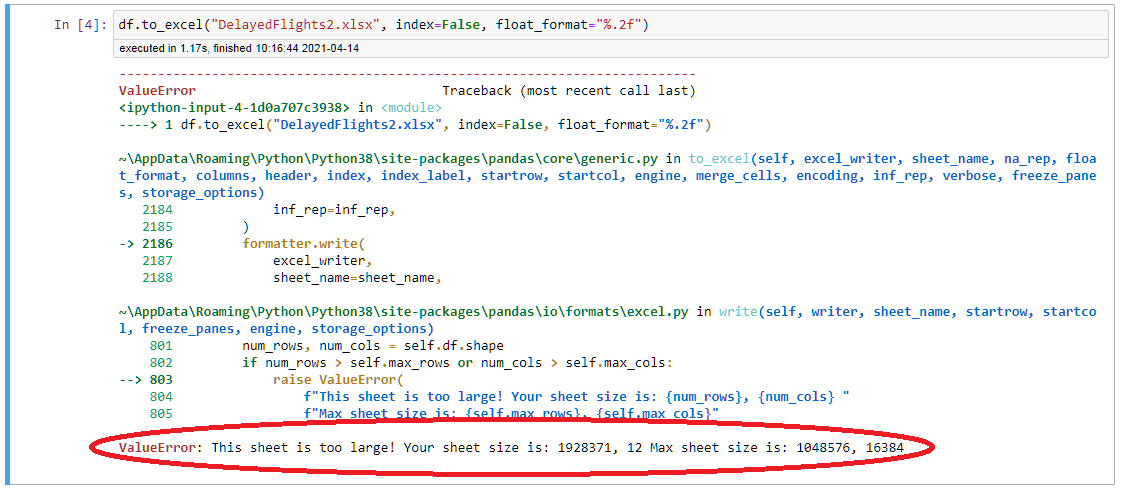

In [ ]:
#Farem varies fulles, en el mateix excel, i dividirem l'exel en fulles, pe.ex. d'aerolínies
group = df.groupby("AEROLINIA")
group_l = list(group)

In [ ]:
#posarem l'aerolínia de nom de fulla, però si passa dels deu caràcters retallarem el nom doncs si el posem sencer
#ens dona error i tampoc és pràctic (el màxim nombre permès de caràcters per nom de fulla es de 31)
with pd.ExcelWriter('DelayedFlights.xlsx') as writer:
    for i in range(0, len(group_l)):
        aerolinia = group_l[i][0]
        if len(aerolinia) > 10: aerolinia = aerolinia[:10] + "..."
        aerolinia_df = group_l[i][1]
        aerolinia_df.to_excel(writer, sheet_name=aerolinia, index=False)

Podem obrir l'excel desat on veiem tots els sheets amb cada una de les aerolínies
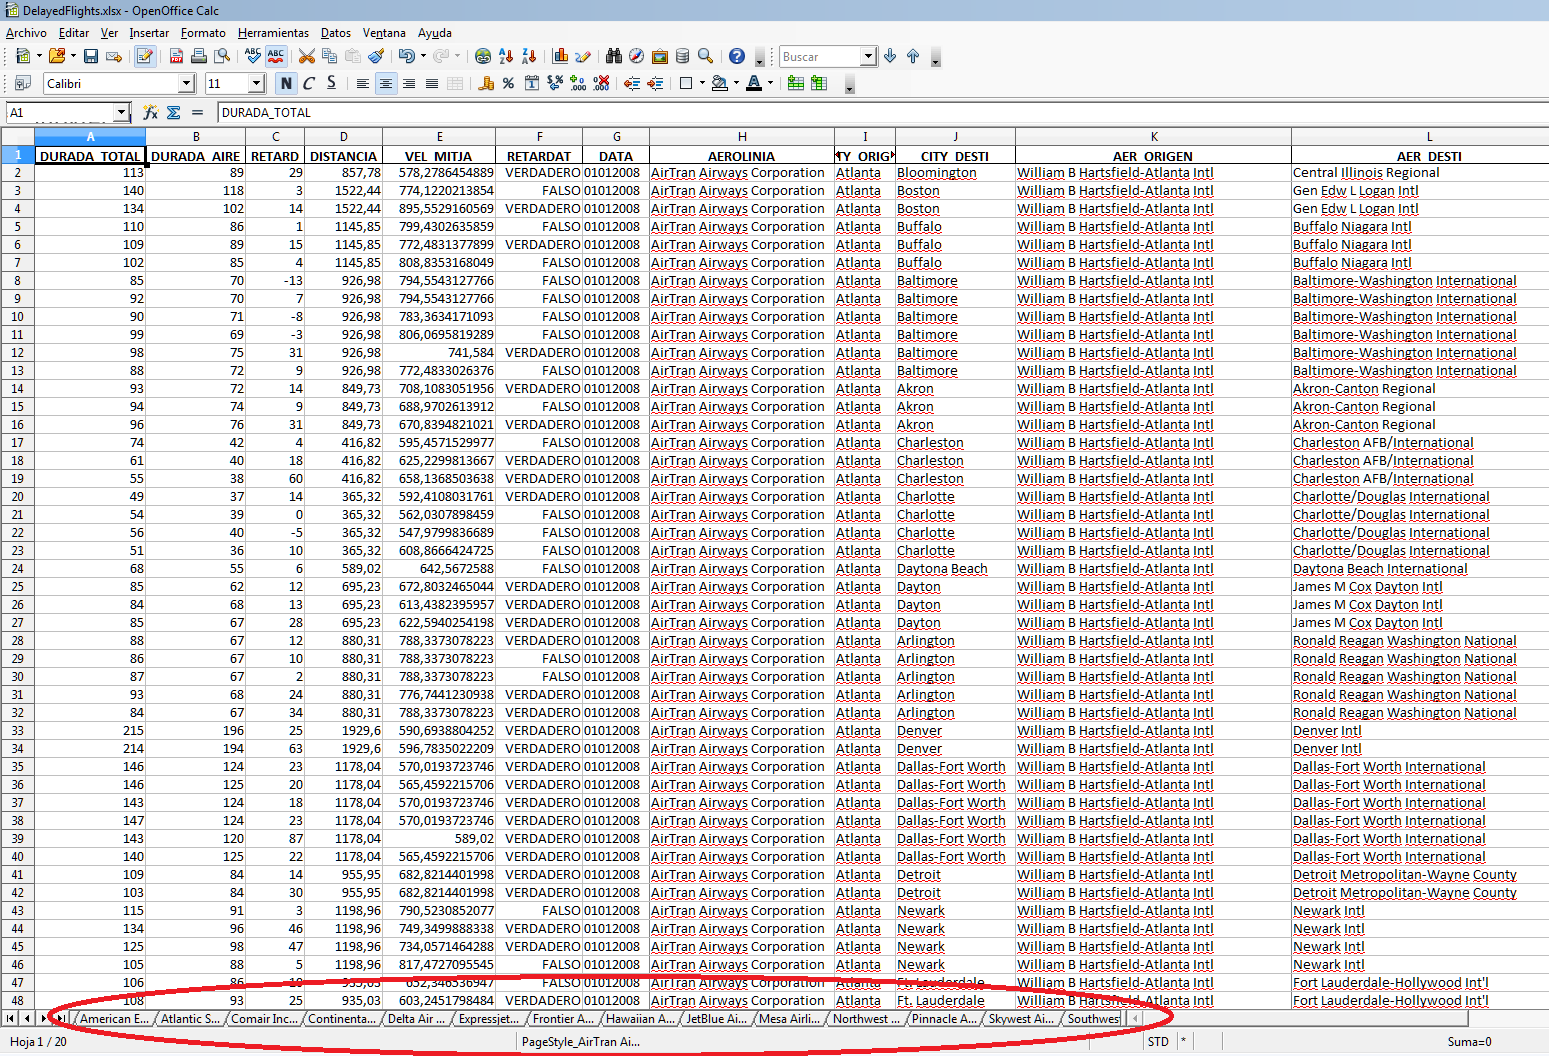